In [1]:
import matplotlib.pyplot as plt
import numpy as np

from flygym import Fly, Camera, SingleFlySimulation
from flygym.arena import (
    FlatTerrain,
    GappedTerrain,
    BlocksTerrain,
    MixedTerrain,
)
from flygym.examples.common import PreprogrammedSteps

In [2]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

arenas = {
    "flat": FlatTerrain(),
    "gapped": GappedTerrain(),
    "blocks": BlocksTerrain(rand_seed=0),
    "mixed": MixedTerrain(rand_seed=0),
}

In [3]:
preprogrammed_steps = PreprogrammedSteps()
joint_angles = np.concatenate(
    [
        preprogrammed_steps.get_joint_angles(leg, 0)
        for leg in ["LF", "LM", "LH", "RF", "RM", "RH"]
    ]
)

In [4]:
images = {}
for name, arena in arenas.items():
    print(f"Working on {name}")

    fly = Fly(name="0", spawn_pos=(5, 0, 0.3))

    cam = Camera(
        camera_id="Animat/camera_top_right",
        fly=fly,
        play_speed=0.1,
        align_camera_with_gravity=True,
        window_size=(720, 720),
        play_speed_text=False,
    )
    sim = SingleFlySimulation(
        fly=fly,
        cameras=[cam],
        timestep=1e-4,
        arena=arena,
    )
    obs_list = []

    for i in range(50):
        action = {"joints": joint_angles}
        obs, reward, terminated, truncated, info = sim.step(action)
        obs_list.append(obs)

    img = sim.render()[0]

    sim.close()
    images[name] = img

Working on flat
Working on gapped
Working on blocks
Working on mixed


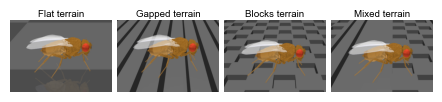

In [5]:
fig_width = 108.75
height = 18.183
ax_width = 25.86

fig, axs = plt.subplots(1, 4, figsize=(fig_width / 25.4, height / 25.4))
ratio = height / ax_width

fig.subplots_adjust(0, 0, 1, 1, 0, 0)
for i, (name, img) in enumerate(images.items()):
    ax = axs[i]
    ax.imshow(img)
    ax.set_title(f"{name.title()} terrain", fontsize=7, pad=3)
    ax.axis("off")

    w = 550
    height = w * ratio
    x0 = 25
    y0 = 170
    ax.set_xlim(x0, x0 + w)
    ax.set_ylim(y0 + height, y0)

plt.savefig(
    "outputs/terrains.pdf", bbox_inches="tight", pad_inches=0, transparent=True, dpi=600
)